In [22]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *

import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/data/data_combined_cleaned.csv")

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [9]:
df = df[~df.SalesPrice.isnull()]
df = df.drop(columns=["Id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

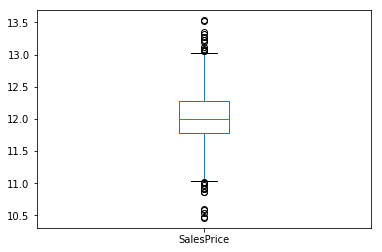

In [15]:
np.log(df.SalesPrice).plot.box()

In [16]:

def is_outlier(a):
    q1, q3 = np.percentile(a, [25, 75])
    iqr = q3 - q1
    upper_whisker = min(max(a), q3 + 1.5 * iqr)
    lower_whisker = max(min(a), q1 - 1.5 * iqr)
    print("Outlier boundary: ", (lower_whisker, upper_whisker))

    q1, q3, iqr, upper_whisker, lower_whisker
    return (a > upper_whisker) | (a < lower_whisker)


In [18]:
df[is_outlier(df.SalesPrice)].shape[0]

Outlier boundary:  (34900.0, 340037.5)


61

In [19]:
df[is_outlier(np.log(df.SalesPrice))].shape[0]

Outlier boundary:  (11.027146428351426, 13.021682213395525)


28

In [26]:
target = "SalesPrice"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
# Log transformation reduces the impact of the outliers
y = np.log(df[target]) 

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", linear_model.Lasso(alpha=0.007))
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Measure performance
training_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
training_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("Training rmse: ", training_rmse)
print("Test rmse: ", test_rmse)
print("Training r2: ", training_r2)
print("Test r2: ", test_r2)



Training rmse:  0.11843642873297512
Test rmse:  0.14957538554482533
Training r2:  0.9042826132033808
Test r2:  0.8816188365468736


In [31]:
# Cross validation
# Using cross validation, we are trying to find more a reliable score
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv = 5)
scores

array([0.59072711, 0.88820775, 0.83626001, 0.88407242, 0.91838446])

In [30]:
np.mean(scores)

0.8235303472745332

# Hyper parameter grid search

Using hyper parameter grid seach technique we find the set of hyper paremeters that give the best performance.

In [42]:
param_grid = {
    "est__alpha": np.linspace(0.009 - 0.001, 0.009 + 0.001, 10)
}

grid_search = model_selection.GridSearchCV(pipe, param_grid
                        , scoring = "neg_mean_squared_error", cv = 5, verbose=True)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', Lasso(alpha=0.007, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'est__alpha': array([0.008  , 0.00822, 0.00844, 0.00867, 0.00889, 0.00911, 0.00933,
       0.00956, 0.00978, 0.01   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=True)

In [32]:
np.arange(10) * 0.001

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

In [43]:
grid_search.best_params_

{'est__alpha': 0.008666666666666666}

In [36]:
np.linspace(0.009 - 0.001, 0.009 + 0.001, 10)

array([0.008     , 0.00822222, 0.00844444, 0.00866667, 0.00888889,
       0.00911111, 0.00933333, 0.00955556, 0.00977778, 0.01      ])

In [39]:
# Calculate the prediction
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Measure performance
training_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
training_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("Training rmse: ", training_rmse)
print("Test rmse: ", test_rmse)
print("Training r2: ", training_r2)
print("Test r2: ", test_r2)


Training rmse:  0.12173653569245746
Test rmse:  0.1506234331102449
Training r2:  0.8988741689084775
Test r2:  0.8799540739325211
